In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

### (b) Exploring the data

##### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [2]:
# read data
data_path = "../data/CCPP/Folds5x2_pp.xlsx"
df = pd.read_excel(data_path, sheet_name="Sheet1")
display(df)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


From above figure, 9568 rows and 5 columns. Each row represents one data point. Each column represents one feature except the last column is the output/response. 

Features consist of hourly average ambient variables Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), and Relative Humidity (RH) to predict the net hourly electrical energy output (PE) of the plant.

##### ii. Make pairwise scatterplots (scatter matrix) of all the varianbles in the data set including the predictors (independent variables) with the dependent variable.

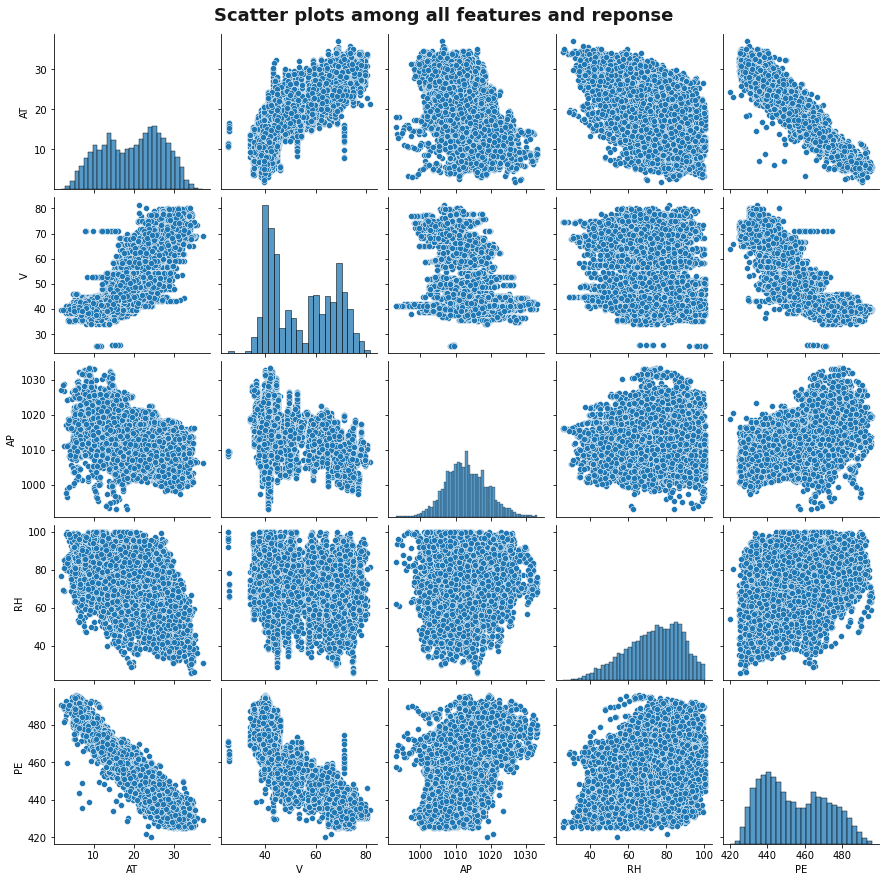

In [3]:
pairplot_fig = sns.pairplot(df, vars=df.columns[:])
plt.subplots_adjust(top=0.95)
pairplot_fig.fig.suptitle("Scatter plots among all features and reponse",
                          fontsize=18, alpha=0.9, weight='bold')
plt.show()

##### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [4]:
result = df.describe()
result.loc['interquartile range'] = result.loc['75%']-result.loc['25%']
display(result)

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
interquartile range,12.210000,24.800000,8.160000,21.502500,28.680000


### (c) For each predictor, fit a simple linear regression model to predict the response

In [5]:
y = df['PE']
results_df = pd.DataFrame(columns=['coefficient(Beta0, Beta1)',
                                'Std. Error(Beta0, Beta1)', 
                                't-statistic(Beta0, Beta1)', 
                                'p-value(Beta0, Beta1)',
                                'resiqual standard error', 'R-squared',
                                'F-statistics',
                                'p-value of F-statistics'])
for feature_name in df.columns[:-1]:
    X = df[feature_name]
    X = sm.add_constant(X)
    res = sm.OLS(y, X).fit()
    res_list = [tuple(np.around(res.params, decimals=4)), 
                tuple(np.around(res.bse, decimals=2)),
                tuple(np.around(res.tvalues, decimals=2)),
                tuple(np.around(res.pvalues, decimals=4)), 
                np.around(np.sqrt(res.mse_resid), decimals=2), 
                np.around(res.rsquared, decimals=2),
                np.around(res.fvalue, decimals=2), res.f_pvalue]
    results_df.loc[feature_name] = res_list

In [6]:
display(results_df)

,"coefficient(Beta0, Beta1)","Std. Error(Beta0, Beta1)","t-statistic(Beta0, Beta1)","p-value(Beta0, Beta1)",resiqual standard error,R-squared,F-statistics,p-value of F-statistics
AT,"(497.0341, -2.1713)","(0.16, 0.01)","(3177.28, -291.72)","(0.0, 0.0)",5.43,0.90,85097.76,0.0
V,"(517.8015, -1.1681)","(0.38, 0.01)","(1370.22, -172.4)","(0.0, 0.0)",8.42,0.76,29722.29,0.0
AP,"(-1055.261, 1.4899)","(25.46, 0.03)","(-41.45, 59.3)","(0.0, 0.0)",14.60,0.27,3516.04,0.0
RH,"(420.9618, 0.4557)","(0.82, 0.01)","(511.68, 41.4)","(0.0, 0.0)",15.72,0.15,1713.85,0.0


From above t-statistic and p-value, we can see that all of the predictors are statistically significantly associated with the response. However, from R-squared, 'AP' and 'RH' have strong nonlinear relationships with the response 'PE'.

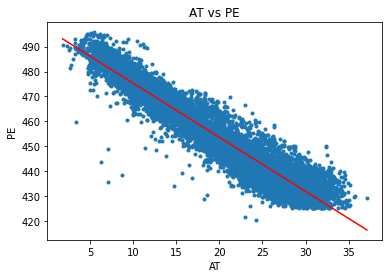

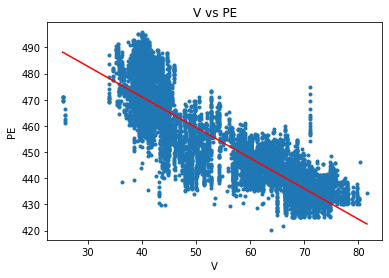

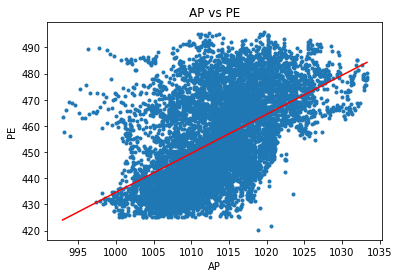

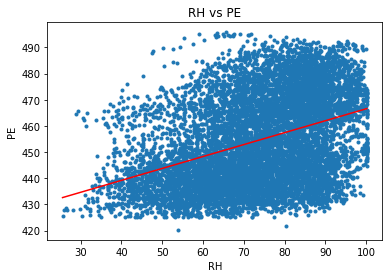

In [7]:
# plot the simple linear line predictor vs response
for predictor_name in df.columns[:-1]:
    fig, ax = plt.subplots()
    predictor = df[predictor_name]
    ax.scatter(predictor, y, marker='.')
    coe = results_df.loc[predictor_name, 'coefficient(Beta0, Beta1)']
    line_x = np.linspace(predictor.min(), predictor.max(), 50)
    line_y = coe[0] + coe[1]*line_x
    ax.plot(line_x, line_y, color='r')
    ax.set_xlabel(predictor_name)
    ax.set_ylabel('PE')
    ax.set_title(f'{predictor_name} vs PE')
plt.show()

"In simple regression, an outlier is an observation whose dependent variable value is conditionally unusual given the value of the independent variable" Fox(2015).
So, I would remove some outliers based on "conditionally unusual" rule, like I circle out those points as follows. 

<img src="../imgs/AT_vs_PE.png" alt="ATPE"/><img src="../imgs/V_vs_PE.png" alt="VPE"/>
<img src="../imgs/AP_vs_PE.png" alt="APPE"/><img src="../imgs/RH_vs_PE.png" alt="RHPE"/>

### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results.

In [8]:
y = df['PE']
X = df.iloc[:,:-1]
X = sm.add_constant(X)
multi_res = sm.OLS(y, X).fit()
print(multi_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:14:24   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

All p-values of predictors are very low, so we cannot reject the null hypothesis for all of predictors.

### (e) How do your results from 4c compare to your results from 4d?

In [9]:
# univariable coefficients
uni_coe = [v[1] for i, v in results_df.iloc[:,0].items()]
#multivariable coefficients
multi_coe = list(multi_res.params.iloc[1:])

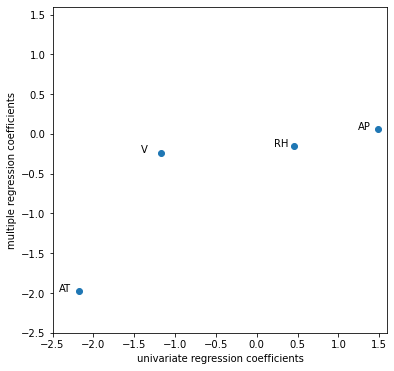

In [10]:
annotations=df.columns[:-1]
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(uni_coe, multi_coe, marker='o')
ax.set_xlabel('univariate regression coefficients')
ax.set_ylabel('multiple regression coefficients')
plt.xlim(-2.5, 1.6)
plt.ylim(-2.5, 1.6)
for i, label in enumerate(annotations):
    plt.annotate(label, (uni_coe[i]-0.25, multi_coe[i]))
plt.show()

We see that 'AT' shows strong linear relationship with response and then in above plot, 'AT' coeffient in simple linear regression is most close to that in multiple regression. Other coeffients for multiple regression are smaller and very clost to 0. My guess is that 'V, 'RH' and 'AP' are correlated with 'AT'.

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form

In [11]:
# create new data with degree2 and degree3 of original data
degree3_data = [] 
for predictor_name in df.columns[:-1]:
    d = np.asarray(df[predictor_name])
    d = d[:,np.newaxis]
    d = np.concatenate((d, d**2, d**3), axis=1)
    degree3_data.append(d)

In [12]:
# fit new predictor data to linear model one by one
degree3_res = []
y = df['PE']
for X in degree3_data:
    X = sm.add_constant(X)
    res = sm.OLS(y, X).fit()
    degree3_res.append(res) 

# summary statistical results
degree3_res_pd = pd.DataFrame(columns=['coefficient',
                                       'Std. Error',
                                       't-statistic',
                                       'p-value',
                                       'resiqual standard error', 'R-squared',
                                       'F-statistics',
                                       'p-value of F-statistics'])
for i, predictor_name in enumerate(df.columns[:-1]):
    res_list = [tuple(np.around(degree3_res[i].params, decimals=4)),
                tuple(np.around(degree3_res[i].bse, decimals=2)),
                tuple(np.around(degree3_res[i].tvalues, decimals=2)),
                tuple(np.around(degree3_res[i].pvalues, decimals=4)),
                np.around(np.sqrt(degree3_res[i].mse_resid), decimals=2),
                np.around(degree3_res[i].rsquared, decimals=2),
                np.around(degree3_res[i].fvalue, decimals=2), degree3_res[i].f_pvalue]
    degree3_res_pd.loc[predictor_name] = res_list

display(degree3_res_pd)

,coefficient,Std. Error,t-statistic,p-value,resiqual standard error,R-squared,F-statistics,p-value of F-statistics
AT,"(492.7281, -0.6103, -0.1251, 0.0027)","(0.67, 0.12, 0.01, 0.0)","(732.25, -4.94, -18.2, 22.59)","(0.0, 0.0, 0.0, 0.0)",5.07,0.91,32991.03,0.0
V,"(554.1468, -2.1444, -0.0027, 0.0001)","(9.15, 0.51, 0.01, 0.0)","(60.56, -4.21, -0.29, 2.46)","(0.0, 0.0, 0.7685, 0.0137)",8.10,0.78,10982.27,0.0
AP,"(0.0747, 25.2556, -0.05, 0.0)","(0.01, 3.0, 0.01, 0.0)","(8.41, 8.41, -8.44, 8.61)","(0.0, 0.0, 0.0, 0.0)",14.53,0.27,1812.81,0.0
RH,"(468.4135, -1.7292, 0.0321, -0.0002)","(10.54, 0.49, 0.01, 0.0)","(44.42, -3.56, 4.43, -4.34)","(0.0, 0.0004, 0.0, 0.0)",15.70,0.15,579.18,0.0


P-values of high degree coefficients for 'AT', 'AP' and 'RH' are very small, which means they have slightly nonlinear association although those coefficients themselves are very small. However, the problem is they can be overfitting models. For 'V', p-values for high degree coefficients are high so that suggests there is not nonlinear association between 'V' and output. In summary, for 'AT', 'AP' and 'RH', there is a evidence of nonlinear relationship. For 'V', there is a strong evidence of no nonlinear relationship.

### (g) Is there evidence of association of interactions of predictors with the response?

In [13]:
y = df['PE']
X = df.iloc[:,:-1]
poly = PolynomialFeatures(degree=2, interaction_only=True)
X = poly.fit_transform(X)
feature_names = list(poly.get_feature_names_out()[1:])
X = pd.DataFrame(X, columns=['const']+feature_names)
interaction_res = sm.OLS(y, X).fit()
print(interaction_res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:14:24   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

From above statistic results, 'AT x V', 'AT x RH' and 'V x AP' show strong statistically significant asscociation. 'V x RH' and 'AP x RH' also are a little weaker statistically significant. In summary, there are strong multicollinearity among those predictors.

### (h) Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a re- gression model involving all possible interaction terms $X_{i}X_{j}$ as well as quadratic nonlinearities $X_{j}^2$, and remove insignificant variables using p-values (be careful about interaction terms).

In [14]:
# data split, set random_state for reproductivity
train = df.sample(frac=0.7, random_state=121)
test = df.drop(train.index)
test.shape, df.shape

((2870, 5), (9568, 5))

In [15]:
# original mutilvariate regression model
y_ori = np.array(train['PE'])
X_ori = train.iloc[:,:-1]
X_ori = sm.add_constant(X_ori)
model_ori = sm.OLS(y_ori, X_ori)
res_ori = model_ori.fit()
print(res_ori.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.165e+04
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:14:24   Log-Likelihood:                -19677.
No. Observations:                6698   AIC:                         3.936e+04
Df Residuals:                    6693   BIC:                         3.940e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        447.8788     11.723     38.206      0.0

In [16]:
# regression model with interaction terms and square terms
y_inter_squ = np.array(train['PE'])
X_inter_squ = train.iloc[:,:-1]
poly = PolynomialFeatures(degree=2)
X_inter_squ = poly.fit_transform(X_inter_squ)
feature_names = list(poly.get_feature_names_out()[1:])
X_inter_squ = pd.DataFrame(X_inter_squ, columns=['const']+feature_names)
res_inter_squ = sm.OLS(y_inter_squ, X_inter_squ).fit()
print(res_inter_squ.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7160.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:14:24   Log-Likelihood:                -19215.
No. Observations:                6698   AIC:                         3.846e+04
Df Residuals:                    6683   BIC:                         3.856e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7766.4788   1450.461     -5.354      0.0

From above result, I decide to delete 'AT AP', 'V^2', 'V AP' and 'V RH'.

In [17]:
# regression model with interaction terms and square terms 
# after dropping some predictors
drop_columns = ['AT AP', 'V^2', 'V AP', 'V RH']
y_inter_squ = np.array(train['PE'])
X_inter_squ = train.iloc[:,:-1]
poly = PolynomialFeatures(degree=2)
X_inter_squ = poly.fit_transform(X_inter_squ)
feature_names = list(poly.get_feature_names_out()[1:])
X_inter_squ = pd.DataFrame(X_inter_squ, columns=['const']+feature_names)
X_inter_squ = X_inter_squ.drop(columns=drop_columns)
model_inter_squ = sm.OLS(y_inter_squ, X_inter_squ)
res_inter_squ = model_inter_squ.fit()
print(res_inter_squ.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.001e+04
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:14:24   Log-Likelihood:                -19223.
No. Observations:                6698   AIC:                         3.847e+04
Df Residuals:                    6687   BIC:                         3.854e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.074e+04   1114.727     -9.633      0.0

In [18]:
# prepare test data for two models
test_y = np.asarray(test.iloc[:,-1])[:, np.newaxis]

# two model have different input features
# first model
test_X_ori = np.asarray(test.iloc[:,:-1])
test_X_ori = sm.add_constant(test_X_ori)
#second model
drop_columns = ['AT AP', 'V^2', 'V AP', 'V RH']
poly = PolynomialFeatures(degree=2)
test_X_inter_squ = poly.fit_transform(test.iloc[:,:-1])
test_X_inter_squ = pd.DataFrame(test_X_inter_squ, columns=poly.get_feature_names_out())
test_X_inter_squ = np.asarray(test_X_inter_squ.drop(columns=drop_columns))

In [19]:
# compare two model train mse and test mse
# original multivariate model
train_mse_ori = (res_ori.resid**2).sum()/len(y_ori)
params_ori = np.asarray(res_ori.params)[:, np.newaxis]
predict_ori = test_X_ori.dot(params_ori) 
test_mse_ori = ((predict_ori - test_y)**2).sum()/len(test_y)

In [20]:
# regression model with interaction terms and square terms 
# after dropping some predictors
train_mse_inter_squ = (res_inter_squ.resid**2).sum()/len(y_inter_squ)
params_inter_squ = np.asarray(res_inter_squ.params)[:, np.newaxis]
predict_inter_squ = test_X_inter_squ.dot(params_inter_squ)
test_mse_inter_squ = ((predict_inter_squ - test_y)**2).sum()/len(test_y)

In [21]:
print(f"""original multiple regression model:
training mse: {train_mse_ori:.2f}
test mse: {test_mse_ori:.2f}""")
print(f"""model with interaction terms and square terms:
training mse: {train_mse_inter_squ:.2f}
test mse: {test_mse_inter_squ:.2f}""")

original multiple regression model:
training mse: 20.85
test mse: 20.60
model with interaction terms and square terms:
training mse: 18.21
test mse: 18.01


### (i) KNN Regression: Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [22]:
# function to find the best k with the lowest mse 
def find_best_k(train, test, Ks, normalize=False):
    '''
    Parameters
    ----------
    train : training data contain features and output
    test : test data contain features and output
    Ks : range of number of nearest neighbors k

    Returns
    -------
    train_mse_list : training mse list of different k 
    test_mse_list : test mse list of different k
    best_k : the k with the smallest test mse 
    '''
    train_mse_list = []
    test_mse_list = []
    X_train = train.iloc[:,:-1]
    y_train = train.iloc[:,-1]
    X_test = test.iloc[:,:-1]
    y_test = test.iloc[:,-1]
    # Standardization
    if normalize:
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    for k in Ks:
        neigh = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
        train_mse = ((neigh.predict(X_train)-y_train)**2).sum()/len(y_train)
        test_mse = ((neigh.predict(X_test)-y_test)**2).sum()/len(y_test)
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
    
    best_k = np.argmin(test_mse_list) + 1
    return (train_mse_list, test_mse_list, best_k, np.min(test_mse_list))

In [23]:
Ks = np.arange(1, 101)
nonnormal_res = find_best_k(train, test, Ks)
normal_res = find_best_k(train, test, Ks, True)
print(f"best k of KNN without normalization is {nonnormal_res[2]}")
print(f"best k of KNN with normalization is {normal_res[2]}")

best k of KNN without normalization is 5
best k of KNN with normalization is 5


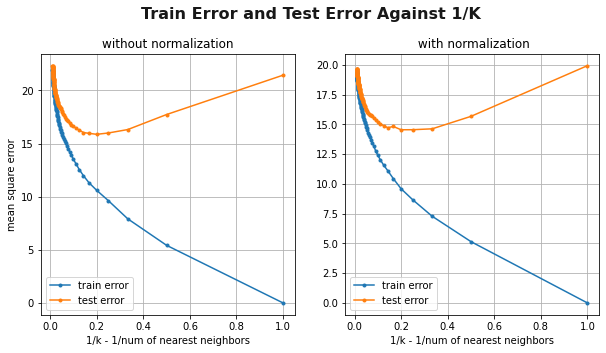

In [24]:
# Plot training error and test error in terms of 1/k
fig, (ax, ax1) = plt.subplots(1,2, figsize=(10,5))
plt.subplots_adjust(top=0.85)
fig.suptitle("Train Error and Test Error Against 1/K",
                          fontsize=16, alpha=0.9, weight='bold')
ax.grid()
ax.plot(1/Ks, nonnormal_res[0], '.-', label="train error")
ax.plot(1/Ks, nonnormal_res[1], '.-', label="test error")
ax.set_xlabel("1/k - 1/num of nearest neighbors")
ax.set_ylabel("mean square error")
ax.set_title("without normalization")
ax.legend()

ax1.grid()
ax1.plot(1/Ks, normal_res[0], '.-', label="train error")
ax1.plot(1/Ks, normal_res[1], '.-', label="test error")
ax1.set_xlabel("1/k - 1/num of nearest neighbors")
ax1.set_title(" with normalization")
ax1.legend()
plt.show()

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis

In [25]:
print("original multiple regression model",
f"test mse: {test_mse_ori:.2f}")
print("model with interaction terms and square terms", 
f"test mse: {test_mse_inter_squ:.2f}")
print(f"KNN without normalization(k=5) test mse: {nonnormal_res[3]:.2f}")
print(f"KNN with normalization(k=5) test mse: {normal_res[3]:.2f}")

original multiple regression model test mse: 20.60
model with interaction terms and square terms test mse: 18.01
KNN without normalization(k=5) test mse: 15.87
KNN with normalization(k=5) test mse: 14.55


Above result lets me remind the "No Free Lunch" theorem. We spend a lot of time analysing the linear regression model. However the result of the regression is not better than KNN, even a little worse. Therefore, obviously KNN is more suitable for this data. 